In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Ignore
# GFG :Read the video from specified path
#https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=videocapture%20set#bool%20VideoCapture::set%28int%20propId,%20double%20value%29
#cam = cv2.VideoCapture("kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV")
#cam.isOpened()
#Doesn't work, retval : false

In [4]:
#Use following command b4 importing napari:
#pip install napari[all] napari_video
#Resources- links used
#https://github.com/janclemenslab/napari-video
#https://forum.image.sc/t/working-with-mov-and-other-movie-files-in-python-dask/34053

In [6]:
import napari
from napari_video.napari_video import VideoReaderNP
# /kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV
#vr = VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV')
#print(vr)

In [7]:
vdos = []
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5138.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5297.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/89. warm/MVI_9495.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/89. warm/MVI_9336.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/90. cool/MVI_9337.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/90. cool/MVI_9338.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/91. new/MVI_9261.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/91. new/MVI_9421.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/88. cold/MVI_5140.MOV'))

#7-10 index test
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/90. cool/MVI_9339.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/89. warm/MVI_5302.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/91. new/MVI_5148.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/88. cold/MVI_9490.MOV'))
#/kaggle/input/include/Clothes_2of2/Clothes/46. Clothing/MVI_5181.MOV

In [8]:
Y_train = pd.DataFrame(columns = ["Class"])
Y_test = pd.DataFrame(["hot","cool","warm","cold"],columns = ["Class"])
labels = ["hot","hot","warm","warm","cool","cool","cold"]
Y_train["Class"] = labels
Y_train, Y_test

(  Class
 0   hot
 1   hot
 2  warm
 3  warm
 4  cool
 5  cool
 6  cold,
   Class
 0   hot
 1  cool
 2  warm
 3  cold)

In [9]:
#Ignore this nash, this is for openPose

!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

#https://www.kaggle.com/code/rkuo2000/openpose-pytorch

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Total 154 (delta 0), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (154/154), 20.18 MiB | 23.67 MiB/s, done.
Resolving deltas: 100% (68/68), done.
/kaggle/working/pytorch-openpose


In [10]:
#this box is for openpose, ignore this nash
import matplotlib.pyplot as plt
import copy
import numpy as np
from src import model
from src import util
#https://github.com/Hzzone/pytorch-openpose/blob/master/src/util.py
from src.body import Body
from src.hand import Hand

In [11]:
!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model
#it's asked to store pretrained models in folder named models

In [12]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')
#.pth files are ML models created by PyTorch machine learning framework for Python.

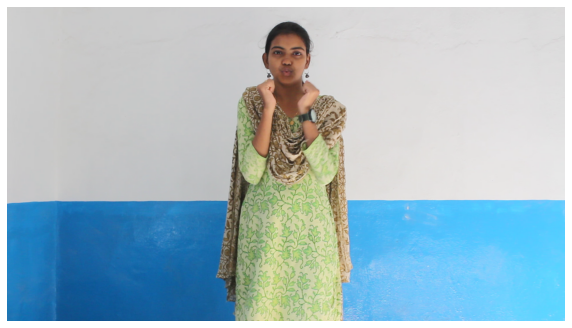

In [13]:
test_vdo = '/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5138.MOV'
test_image = vdos[0][16]#extract a frame
import matplotlib.pyplot as plt
# image = plt.imread(test_image) 
#imread will take filename as a string
plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.axis('off')
plt.show()

Detect Body

keypoints index : index = int(subset[n][i])

keypoints coord : x,y = candidate[index][0:2]
Candidates each element is a list of 4 elemnts. what are last 2?  first two are x,y co ordinates

In [14]:
oriImg = vdos[0][15]

candidate, subset = body_estimation(oriImg) #retval: 2 ndarrays
#canvas is ndarray
canvas = copy.deepcopy(oriImg) #recursively copies, so that nested objs are also copied truly and any chnage on copy doesn't affect the original
#canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

18
1


In [15]:
#https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/src/openpose/hand/handDetector.cpp

hands_list = util.handDetect(candidate, subset, oriImg)
''' handDetect:
    return value: [[x, y, w, True if left hand else False]].
    width=height since the network require squared input.
    x, y is the coordinate of top left 
'''
all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) #pretrained model, last layer: convolution_param-> num_output: 22
    print(peaks)
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==1, peaks[:, 1], peaks[:, 1]+y) #original: np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

[[  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [115 151]
 [  0   0]
 [  0   0]
 [138 151]
 [120 155]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(canvas) #canvas[:, :, [2, 1, 0]]
plt.axis('off')
plt.show()

In [ ]:
hands_list

In [ ]:
all_hand_peaks

In [23]:
print(len(vdos))
len(vdos[0]), vdos[0]

11


(49,
 /kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5138.MOV with 49 frames of size (1080, 1920, 3) at 25.00 fps)

In [ ]:
#one vdo generate hand keypoints
i = 0
vdo_canvas = []
Num_of_frames = len(vdos[i])
for f in range(Num_of_frames):
    oriImg = vdos[0][f]

    candidate, subset = body_estimation(oriImg)
    canvas = copy.deepcopy(oriImg)
    hands_list = util.handDetect(candidate, subset, oriImg)
    all_hand_peaks = []
    for x, y, w, is_left in hands_list:
        peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) 
        peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
        peaks[:, 1] = np.where(peaks[:, 1]==1, peaks[:, 1], peaks[:, 1]+y) 
        all_hand_peaks.append(peaks)

    canvas = util.draw_handpose(canvas, all_hand_peaks)
    vdo_canvas.append(canvas)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(vdo_canvas[40]) #canvas[:, :, [2, 1, 0]]
plt.axis('off')
plt.show()

In [ ]:
#for vdo generate hand keypoints
num_of_vdos = len(vdos)
vdos_keypoints = []
for i in range(num_of_vdos):
    vdo_canvas = []
    Num_of_frames = len(vdos[i])
    for f in range(Num_of_frames):
        oriImg = vdos[0][f]

        candidate, subset = body_estimation(oriImg)
        canvas = copy.deepcopy(oriImg)
        hands_list = util.handDetect(candidate, subset, oriImg)
        all_hand_peaks = []
        for x, y, w, is_left in hands_list:
            peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) 
            peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
            peaks[:, 1] = np.where(peaks[:, 1]==1, peaks[:, 1], peaks[:, 1]+y) 
            all_hand_peaks.append(peaks)

        canvas = util.draw_handpose(canvas, all_hand_peaks)
        vdo_canvas.append(canvas)
    vdos_keypoints.append(vdo_canvas)

In [ ]:
#Ignore this box, I was experimenting
#for one vdo, convert frames into np array
vdo_frames = vdos[0][0]
n = len(vdo_frames)
vdo_frames_np_arr = []
for i in range(n):
    vdo_frames_np_arr.append(np.array(vdo_frames[i],dtype = 'float32'))


In [ ]:
#useless ish, in our list of vdo each element is of type napari_video.napari_video.VideoReaderNP and the following code is converting it into np.ndarray
#Each vdo has frames, each frame is of type np.ndarray

#for all vdos

vdo_np_arr = [] # list of np array of np array of frames
#np array of frames is a vdo.
for j in range(len(vdos)):
    vdo_frames = vdos[j]
    n = len(vdo_frames)
    vdo_frames_np_arr = []
    for i in range(n):
        vdo_frames_np_arr.append(np.array(vdo_frames[i],dtype = 'float32'))
    vdo_np_arr.append(np.array(vdo_frames_np_arr,dtype = 'float32'))

In [ ]:
#Ignore this box as well nash, again was trying to understand the object type and dimensions
vr = vdos[0][0]
type(vdos[0][0]),type(vdos[0]), type(vdo_np_arr[0])

In [ ]:
X_train = pd.DataFrame(vdo_np_arr[:6], columns = ["Video"])
X_test = pd.DataFrame(vdo_np_arr[7:], columns = ["Video"])


In [ ]:

X_train.shape

In [ ]:
#Caution runnning this takes alot of time, use X_test.shape instead
X_test.shape